# Overview

### 1. Gathering Data

### 2. Assessing Data

### 3. Cleaning Data

### 4. Analyzing and Visualizing

# 1. Gathering Data

In [1]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# gather twitter archive
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# gather image predictions
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [4]:
# configure twitter API
#auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
#auth.set_access_token(config.access_token, config.access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# complete information using twitter API
#with open('data/tweet_json.txt','w') as outfile:
    # call infos
    #for i in archive['tweet_id']:
        # handling exception
        #try:
            #tweet = api.get_status(i,tweet_mode='extended')
            #json.dump(tweet._json, outfile)
            #outfile.write("\n")
        #except:
            #e = os.sys.exc_info()[0]
            
# inspiration from try/except : https://wiki.python.org/moin/HandlingExceptions

In [6]:
# elements to save 
elements = ['id', 'favorite_count', 'retweet_count']

# create dictionary
data = []
with open('tweet-json.txt' , encoding = 'utf-8') as r: 
    json_tweet = r.readline()
    while json_tweet:
        # use json.loads convert json_tweet to a dictionary structure
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in elements)
        data.append(data_row)
        json_tweet = r.readline()
        
            
# create Data Frame    
json_tweets = pd.DataFrame.from_dict(data)

In [7]:
json_tweets.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# 2. Assessing Data

## 2.1 Assessing archive

In [8]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# get info
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# check duplicate id
archive['tweet_id'].duplicated().sum()

0

In [11]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Buddy          7
an             7
Toby           7
Daisy          7
Leo            6
Bella          6
Stanley        6
Jax            6
Rusty          6
Milo           6
Koda           6
Jack           6
Dave           6
Scout          6
Oscar          6
Sammy          5
            ... 
Rascal         1
Sunshine       1
Mauve          1
Doobert        1
Sailer         1
Stella         1
Butters        1
Filup          1
Stu            1
Pip            1
Mya            1
Dido           1
Suki           1
Ferg           1
Trip           1
Lance          1
Timofy         1
Jerome         1
Meatball       1
Devón          1
Gordon         1
Norman         1
Coopson        1
Genevieve      1
Edd            1
Gunner         1
Lipton         1
Flash         

In [12]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## 2.2 Assessing image

In [14]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# check duplicate id 
images.duplicated().sum()

0

In [17]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## 2.3 Assessing json_tweets data

In [18]:
json_tweets.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [19]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
json_tweets.duplicated().sum()

0

## 2.4 Assessing Summary

### Quality

* tweet_id has to be a string
* NaN exist in following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_statud_timestamp
* name column got 745 None string
* Some value in denominator column are not equal to 10
* timestamp should be in datetime
* Some names in the name columns are unsual like 'a', 'the'
* 'None' in doggo, floofer, pupper and puppo column treated as object, it should be treated as null value
* p1 ,p2, and p3 column should be category data type
* Remove retweeting rows.


### Tidiness

* doggo, floofer, pupper and puppo column represents should be in one column
* The archive, images dataframe, and the info dataframe should all be one dataframe

# 3. Cleaning

In [21]:
# copy dataframe
clean_archive=archive.copy()
clean_image=images.copy()
clean_json_tweets=json_tweets.copy()

## 3.1 Cleaning archive

### Define
convert tweet_id datatype to string

In [22]:
# convert tweet_id to string
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)

In [23]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Define
drop retweeting rows and non-necessary columns

In [24]:
# drop rows
clean_archive = clean_archive[clean_archive['in_reply_to_status_id'].isnull()]
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

In [25]:
# drop columns
clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [26]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


In [27]:
clean_archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Define
convert timestamp to datetime

In [28]:
# convert timestamp to datetime
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

### Define
change None by NaN for data in name, doggo, floofer, pupper and puppo columns

In [29]:
# change None by NaN
clean_archive['doggo']=clean_archive['doggo'].replace('None', np.nan)
clean_archive['floofer']=clean_archive['floofer'].replace('None', np.nan)
clean_archive['pupper']=clean_archive['pupper'].replace('None', np.nan)
clean_archive['puppo']=clean_archive['puppo'].replace('None', np.nan)

In [30]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Define
Create one column with doggo, floofer, pupper and puppo columns

In [31]:
# list to store data=
dog_list = []

# function to create a column with dog type
def dog_type(row):
    if row['doggo'] == 'doggo':
        # add to list
        dog_list.append('doggo')
    elif row['floofer'] == 'floofer':
        dog_list.append('floofer')
    elif row['pupper'] == 'pupper':
        dog_list.append('pupper')
    elif row['puppo'] == 'puppo':
        dog_list.append('puppo')
    else: 
        dog_list.append('None')

clean_archive.apply(dog_type, axis=1)
clean_archive['stage'] = dog_list

In [32]:
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [33]:
clean_archive.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [34]:
clean_archive.stage.value_counts()

None       1761
pupper      221
doggo        83
puppo        23
floofer       9
Name: stage, dtype: int64

In [35]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [36]:
clean_archive.name.value_counts()

None        603
a            55
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
the           8
Toby          7
Daisy         7
Jax           6
Bailey        6
Oscar         6
an            6
Koda          6
Stanley       6
Bo            6
Bella         6
Milo          5
Dave          5
Louis         5
Buddy         5
Rusty         5
Bentley       5
Leo           5
Chester       5
           ... 
Dunkin        1
Terrance      1
Milky         1
Jaspers       1
mad           1
Jerome        1
Emanuel       1
Timofy        1
Halo          1
Cannon        1
Rumble        1
Grey          1
Stuart        1
Rilo          1
Augie         1
Walker        1
Mike          1
Tuck          1
Philbert      1
Monty         1
Pip           1
Norman        1
Mya           1
Dido          1
Suki          1
Ferg          1
Trip          1
Grady         1
Lance         1
Livvie        1
Name: name, Length: 955,

### Define
The unusal names actually are all lowercase or are 'None'. So I extracts the tweet text that contains key words like 'name is' and 'named' then use regex expression to extract the name. If their name are not in the tweet text then their name will be converted to 'None'.

In [37]:
# Check for text with lowercase name and consists of 'name is'
name_is_list = clean_archive['text'].loc[(clean_archive['name'].str.islower()) & (clean_archive['text'].str.contains('name is'))].tolist()
name_is_list

["This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB",
 "This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"]

In [38]:
# replace with the correct name
for entry in name_is_list: 
    mask = clean_archive.text == entry 
    clean_archive.loc[mask,'name'] = re.findall(r"name is\s(\w+)", entry)

In [39]:
# Check for text with lowercase name and consists of 'named'
name_is_list1 = clean_archive['text'].loc[(clean_archive['name'].str.islower()) & (clean_archive['text'].str.contains('named'))].tolist()
name_is_list1

["This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI",
 'This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3',
 'This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7',
 "This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr",
 'This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo',
 "This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj",
 "This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8i

In [40]:
# replace with the correct name
for entry in name_is_list1: 
    mask = clean_archive.text == entry 
    clean_archive.loc[mask,'name'] = re.findall(r"named\s(\w+)", entry)

In [41]:
# Check for name is equal to 'None' and consists of 'name is'
name_is_list2 = clean_archive['text'].loc[(clean_archive['name']=='None') & (clean_archive['text'].str.contains('name is'))].tolist()
name_is_list2

['I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk',
 "Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0",
 "We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT",
 "This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP",
 'Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm']

In [42]:
# replace with the correct name
for entry in name_is_list2: 
    mask = clean_archive.text == entry 
    clean_archive.loc[mask,'name'] = re.findall(r"name is\s(\w+)", entry)

In [43]:
# Check for name is equal to 'None' and consists of 'name is'
name_is_list3 = clean_archive['text'].loc[(clean_archive['name']=='None') & (clean_archive['text'].str.contains('named'))].tolist()
name_is_list3

['Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m',
 'Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN',
 'This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7']

In [44]:
# replace with the correct name
for entry in name_is_list3: 
    mask = clean_archive.text == entry 
    clean_archive.loc[mask,'name'] = re.findall(r"named\s(\w+)", entry)

In [45]:
clean_archive.name.value_counts()

None          595
a              35
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
the             8
Sadie           8
Lola            8
Winston         8
Toby            7
Daisy           7
Jax             6
Oscar           6
Bailey          6
Stanley         6
Bella           6
Bo              6
Koda            6
Milo            5
Rusty           5
Dave            5
Leo             5
Louis           5
an              5
Buddy           5
Chester         5
Scout           5
             ... 
Milky           1
Sabertooth      1
Gerbald         1
Meatball        1
Stu             1
Emanuel         1
Philbert        1
Halo            1
Cannon          1
Rumble          1
Grey            1
Stuart          1
Rilo            1
Augie           1
Walker          1
Thea            1
Tuck            1
Monty           1
Jerome          1
Pip             1
Norman          1
Mya             1
Dido            1
Suki            1
Ferg      

In [46]:
# find the lower case names in clean_archive and confirm they are unsual names
lower = []

for word in clean_archive['name']:
    if word.islower():
         lower.append(word)
Counter(lower)       

Counter({'such': 1,
         'a': 35,
         'quite': 3,
         'not': 2,
         'one': 4,
         'incredibly': 1,
         'very': 4,
         'his': 1,
         'an': 5,
         'actually': 2,
         'just': 3,
         'getting': 2,
         'mad': 1,
         'this': 1,
         'unacceptable': 1,
         'all': 1,
         'old': 1,
         'infuriating': 1,
         'the': 8,
         'by': 1,
         'officially': 1,
         'life': 1,
         'light': 1,
         'space': 1})

In [47]:
# replacing unsual names with None value
for items in lower:
    clean_archive['name'].replace(items, 'None', inplace=True)

In [48]:
lower1 = []

for word in clean_archive['name']:
    if word.islower():
         lower1.append(word)
Counter(lower1)  

Counter()

In [49]:
clean_archive.name.value_counts()

None        677
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Daisy         7
Toby          7
Jax           6
Oscar         6
Bella         6
Stanley       6
Koda          6
Bo            6
Bailey        6
Rusty         5
Leo           5
Scout         5
Chester       5
Milo          5
Bentley       5
Buddy         5
Dave          5
Zoey          5
Louis         5
Winnie        4
           ... 
Terrance      1
Milky         1
Jaspers       1
Gerbald       1
Stu           1
Jerome        1
Timofy        1
Lance         1
Julius        1
Kohl          1
Emanuel       1
Halo          1
Cannon        1
Rumble        1
Grey          1
Stuart        1
Rilo          1
Augie         1
Walker        1
Thea          1
Dale          1
Monty         1
Pip           1
Norman        1
Mya           1
Suki          1
Ferg          1
Trip          1
Grady         1
Livvie        1
Name: name, Length: 954,

### Define
get dataframe that not equal to 10 then observe it. Actually some of the rating is extraction problem so I replace it manually.

In [50]:
# get dataframe that not equal to 10
not_equal_ten = clean_archive.loc[clean_archive['rating_denominator']!=10]

# print text and index
for i in not_equal_ten['text']:
        print(i)
        print(not_equal_ten[not_equal_ten['text']==i].index)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Int64Index([433], dtype='int64')
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Int64Index([516], dtype='int64')
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Int64Index([902], dtype='int64')
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Int64Index([1120], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64I

In [51]:
# replace data manually
clean_archive.loc[clean_archive.index == 1068, 'rating_numerator'] = 14
clean_archive.loc[clean_archive.index == 1165, 'rating_numerator'] = 13
clean_archive.loc[clean_archive.index == 1202, 'rating_numerator'] = 11
clean_archive.loc[clean_archive.index == 1662, 'rating_numerator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_numerator'] = 9

clean_archive.loc[clean_archive.index == 1068, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1165, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1202, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1662, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_denominator'] = 10

In [52]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


## 3.2 Cleaning image

### Define
convert tweet_id datatype to string

In [53]:
# convert tweet_id to string
clean_image['tweet_id']=clean_image['tweet_id'].astype(str)

In [54]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
convert p1 ,p2, and p3 to category.

In [55]:
# convert p1 ,p2, and p3 to category.
clean_image.p1 = clean_image.p1.astype('category')
clean_image.p2 = clean_image.p2.astype('category')
clean_image.p3 = clean_image.p3.astype('category')

In [56]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


## 3.3 Cleaning json_tweets

### Define
convert id datatype to string

In [57]:
# convert id to string
clean_json_tweets['id']=clean_json_tweets['id'].astype(str)

In [58]:
clean_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## 3.4 Merging data

In [59]:
# merge by id with image 

df_final = clean_image.merge(clean_archive, left_on='tweet_id',right_on='tweet_id',how='inner')
df_final = df_final.merge(clean_json_tweets,left_on='tweet_id',right_on='id',how='inner')

# suppress unnecessary column
df_final = df_final.drop(['id'], axis=1)

### Store data

In [60]:
df_final.to_csv('twitter_archive_master.csv',index=False)

# 4 Analyzing and Visualizing

In [61]:
df_final.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,2535,532
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,132,48
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,128,47
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,311,147
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,111,41


In [62]:
df_final.describe()

,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000
mean,1.201928,0.594558,1.345850e-01,6.016556e-02,12.216134,10.455099,8949.106545,2784.449518
std,0.559020,0.272126,1.010527e-01,5.094156e-02,41.624048,6.789092,12267.799790,4697.662893
min,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,7.000000,81.000000,16.000000
25%,1.000000,0.363091,5.339800e-02,1.608055e-02,10.000000,10.000000,1997.000000,628.500000
50%,1.000000,0.587764,1.173970e-01,4.944380e-02,11.000000,10.000000,4147.000000,1367.000000
75%,1.000000,0.847827,1.955655e-01,9.153815e-02,12.000000,10.000000,11402.500000,3239.000000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,1776.000000,170.000000,132810.000000,79515.000000


In [63]:
df_final['rating_numerator'].value_counts()

12      446
10      418
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
24        1
26        1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

Text(0.5,1,'Ratings Distribution')

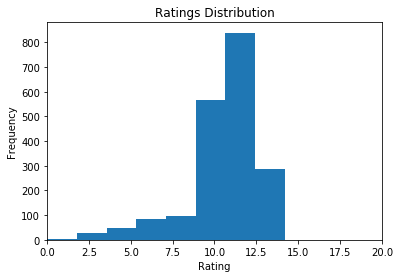

In [64]:
#create histogram for Rating
plt.hist(x = df_final.rating_numerator, bins = 1000)
plt.xlim(0,20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

The highest frequency of ratings are 12

Text(0.5,1,'Distribution of favorite_count')

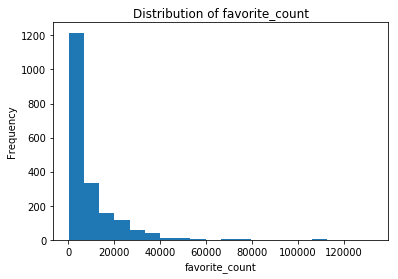

In [65]:
# plot histogram for favorite count
plt.hist(x = df_final.favorite_count, bins = 20)
plt.xlabel('favorite_count')
plt.ylabel('Frequency')
plt.title('Distribution of favorite_count')

Text(0.5,1,'Distribution of retweet_count')

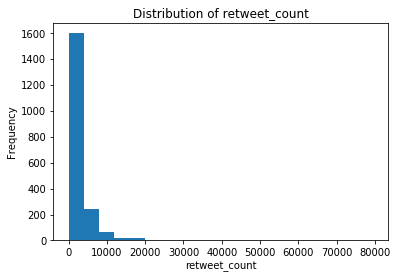

In [66]:
# plot histogram for retweet count
plt.hist(x = df_final.retweet_count, bins = 20)
plt.xlabel('retweet_count')
plt.ylabel('Frequency')
plt.title('Distribution of retweet_count')

Both distribution of favorite_count and retweet_count are similar. Let plot scatter between this two variables to see the relationship.

Text(0,0.5,'retweet_count')

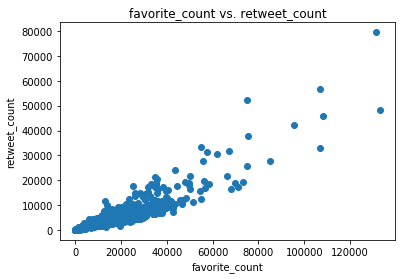

In [67]:
# plot scatter plot between favorite count and retweet count
plt.scatter(df_final.favorite_count, df_final.retweet_count);
plt.title('favorite_count vs. retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [68]:
df_final['favorite_count'].corr(df_final['retweet_count'])

0.91301434861074338

It shows strong positive correlation between favorite count and retweet count with the correlation 0.91